In [1]:
from tensorflow.keras.datasets import mnist

In [2]:
(X_train,y_train),(X_test,y_test) = mnist.load_data()

In [3]:
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [33]:
model = Sequential([
    layers.Conv2D(32, (3,3),activation='relu', input_shape = (28,28,1)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation ='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation= 'relu')
])

In [34]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
Total params: 55,744
Trainable params: 55,744
Non-trai

In [35]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dense(10, activation = 'softmax'))

In [36]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten_1 (Flatten)         (None, 576)              

In [37]:
model.compile(
    loss= 'sparse_categorical_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)

In [16]:
# Prepairing variables
X_train = (X_train / 255).astype("float32")
X_test = (X_test / 255).astype("float32")

In [17]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [38]:
history = model.fit(X_train,y_train,
          epochs = 5,batch_size = 64)

Epoch 1/5
938/938 [==============================] - 21s 21ms/step - loss: 0.1810 - accuracy: 0.9441
Epoch 2/5
938/938 [==============================] - 21s 22ms/step - loss: 0.0529 - accuracy: 0.9840
Epoch 3/5
938/938 [==============================] - 24s 25ms/step - loss: 0.0375 - accuracy: 0.9881
Epoch 4/5
938/938 [==============================] - 22s 24ms/step - loss: 0.0297 - accuracy: 0.9906
Epoch 5/5
938/938 [==============================] - 21s 22ms/step - loss: 0.0234 - accuracy: 0.9929


In [39]:
test_loss,test_acc = model.evaluate(X_test,y_test)

313/313 [==============================] - 6s 18ms/step - loss: 0.0289 - accuracy: 0.9905


In [40]:
test_loss,test_acc

(0.028930410742759705, 0.9904999732971191)

In [41]:
y_pred = model.predict(X_test)

313/313 [==============================] - 3s 9ms/step


In [42]:
from sklearn.metrics import accuracy_score,confusion_matrix
print("Accuracy : ", accuracy_score(y_pred=y_pred.argmax(axis = 1),y_true=y_test))

Accuracy :  0.9905


In [43]:
confusion_matrix(y_true = y_test, y_pred = y_pred.argmax(axis = 1))

array([[ 977,    0,    0,    0,    0,    0,    0,    2,    1,    0],
       [   0, 1124,    2,    2,    0,    2,    0,    5,    0,    0],
       [   1,    1, 1015,    1,    0,    0,    0,   12,    2,    0],
       [   0,    0,    2, 1000,    0,    4,    0,    3,    1,    0],
       [   0,    0,    0,    0,  974,    0,    0,    0,    1,    7],
       [   0,    0,    0,    4,    0,  888,    0,    0,    0,    0],
       [   3,    1,    0,    0,    2,    3,  948,    0,    1,    0],
       [   0,    2,    1,    0,    0,    0,    0, 1022,    1,    2],
       [   3,    0,    0,    0,    0,    0,    0,    2,  968,    1],
       [   1,    1,    0,    2,    2,    5,    0,    5,    4,  989]],
      dtype=int64)

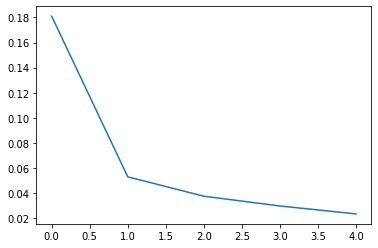

In [44]:
import matplotlib.pyplot as plt
plt.plot(range(5),history.history["loss"])

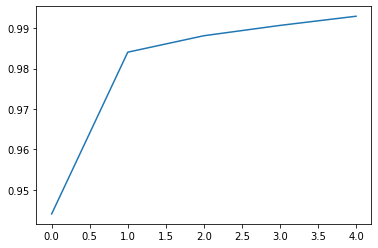

In [45]:
plt.plot(range(5),history.history["accuracy"])